In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


import geopandas as gp
import pycountry

import sys

sys.path.insert(0, "../Notebooks/Functions")
from StatsFunctions import MyFunctions as MF

In [3]:
DF = pd.read_csv("../Data/avgIQpercountry.csv")

In [7]:
DF.rename(
    {
        "Average IQ": "IQ",
        "Literacy Rate": "Literacy",
        "Nobel Prices": "Nobels",
        "HDI (2021)": "HDI",
        "Mean years of schooling - 2021": "SchoolYears",
        " GNI - 2021": "GNI",
        "Population - 2023": "Population",
    },
    axis=1,
    inplace=True,
)

In [8]:
DF = DF.astype({"Population": "float64"})

In [9]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rank         193 non-null    int64  
 1   Country      193 non-null    object 
 2   IQ           193 non-null    float64
 3   Continent    193 non-null    object 
 4   Literacy     193 non-null    float64
 5   Nobels       193 non-null    int64  
 6   HDI          179 non-null    float64
 7   SchoolYears  179 non-null    float64
 8   GNI          179 non-null    float64
 9   Population   193 non-null    float64
dtypes: float64(6), int64(2), object(2)
memory usage: 15.2+ KB


In [143]:
order = DF["Country"].copy().to_list()
colours = dict(zip(DF["Continent"].unique(), sns.color_palette("Paired")))

In [144]:
colours

{'Asia': (0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 'Europe': (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 'North America': (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 'Oceania': (0.2, 0.6274509803921569, 0.17254901960784313),
 'Europe/Asia': (0.984313725490196, 0.6039215686274509, 0.6),
 'Central America': (0.8901960784313725,
  0.10196078431372549,
  0.10980392156862745),
 'South America': (0.9921568627450981,
  0.7490196078431373,
  0.43529411764705883),
 'Africa': (1.0, 0.4980392156862745, 0.0)}

In [10]:
DF.head()

,Rank,Country,IQ,Continent,Literacy,Nobels,HDI,SchoolYears,GNI,Population
0,1,Japan,106.48,Asia,0.99,29,0.925,13.4,42274.0,1.232945e+08
1,2,Taiwan,106.47,Asia,0.96,4,NaN,NaN,NaN,1.014354e+07
2,3,Singapore,105.89,Asia,0.97,0,0.939,11.9,90919.0,6.014723e+06
3,4,Hong Kong,105.37,Asia,0.94,1,0.952,12.2,62607.0,7.491609e+06
4,5,China,104.10,Asia,0.96,8,0.768,7.6,17504.0,1.425671e+09


In [11]:
Continents = DF.groupby("Continent").agg(
    {"Literacy": MF.mean, "Population": "sum", "Nobels": "sum"}
)

In [12]:
less_10 = (
    DF.query("Population < 10000000")
    .groupby("Continent")
    .agg({"Literacy": MF.mean, "Population": "sum", "Nobels": "sum"})
    .sum()
)
over_10 = (
    DF.query("Population > 10000000")
    .groupby("Continent")
    .agg({"Literacy": MF.mean, "Population": "sum", "Nobels": "sum"})
)

In [13]:
fig = px.sunburst(
    DF.query("Population > 50_000_000"),
    path=["Continent", "Country"],
    values="Population",
    width=1000,
    height=600,
    title="Countries by population",
)
fig.show()

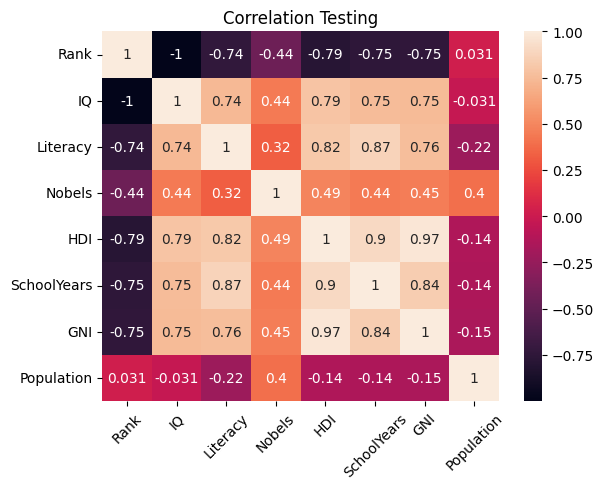

In [14]:
sns.heatmap(
    DF.select_dtypes(include=np.number).corr(method="spearman"), annot=True
)  # tk change heatmap for my example
plt.title("Correlation Testing")
plt.xticks(rotation=45)
plt.show()

In [15]:
DF

,Rank,Country,IQ,Continent,Literacy,Nobels,HDI,SchoolYears,GNI,Population
0,1,Japan,106.48,Asia,0.99,29,0.925,13.4,42274.0,1.232945e+08
1,2,Taiwan,106.47,Asia,0.96,4,NaN,NaN,NaN,1.014354e+07
2,3,Singapore,105.89,Asia,0.97,0,0.939,11.9,90919.0,6.014723e+06
3,4,Hong Kong,105.37,Asia,0.94,1,0.952,12.2,62607.0,7.491609e+06
4,5,China,104.10,Asia,0.96,8,0.768,7.6,17504.0,1.425671e+09
...,...,...,...,...,...,...,...,...,...,...
188,189,Gambia,52.68,Africa,0.58,0,0.500,4.6,2172.0,2.773168e+06
189,190,Guatemala,47.72,Central America,0.79,2,0.627,5.7,8723.0,1.809203e+07
190,191,Liberia,45.07,Africa,0.48,2,0.481,5.1,1289.0,5.418377e+06
191,192,Sierra Leone,45.07,Africa,0.48,0,0.477,4.6,1622.0,8.791092e+06


Text(0.5, 1.0, 'Distribution of average IQ')

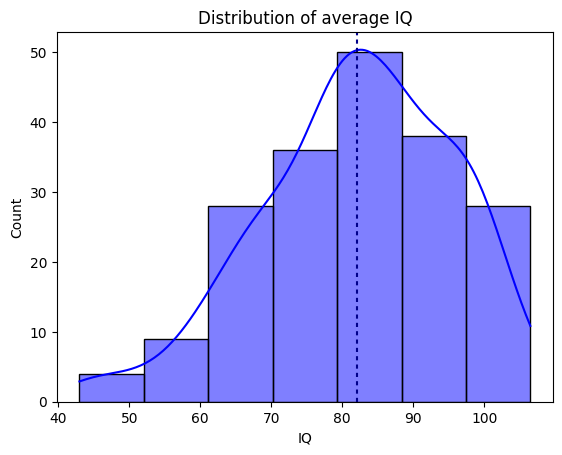

In [16]:
histIQ = sns.histplot(DF, x="IQ", bins=7, kde=True, color="blue")
plt.axvline(
    DF["IQ"].mean(), color="darkblue", label="mean", dashes=(2, 2)
)  # TK change mean to my function
plt.title("Distribution of average IQ")

In [17]:
DF.head()

,Rank,Country,IQ,Continent,Literacy,Nobels,HDI,SchoolYears,GNI,Population
0,1,Japan,106.48,Asia,0.99,29,0.925,13.4,42274.0,1.232945e+08
1,2,Taiwan,106.47,Asia,0.96,4,NaN,NaN,NaN,1.014354e+07
2,3,Singapore,105.89,Asia,0.97,0,0.939,11.9,90919.0,6.014723e+06
3,4,Hong Kong,105.37,Asia,0.94,1,0.952,12.2,62607.0,7.491609e+06
4,5,China,104.10,Asia,0.96,8,0.768,7.6,17504.0,1.425671e+09


In [83]:
# sns.pairplot(
#     DF[
#         [
#             "IQ",
#             "Literacy",
#             "Nobels",
#             "HDI",
#             "Continent",
#             "SchoolYears",
#             "GNI",
#         ]
#     ],
#     hue="Continent",
# )

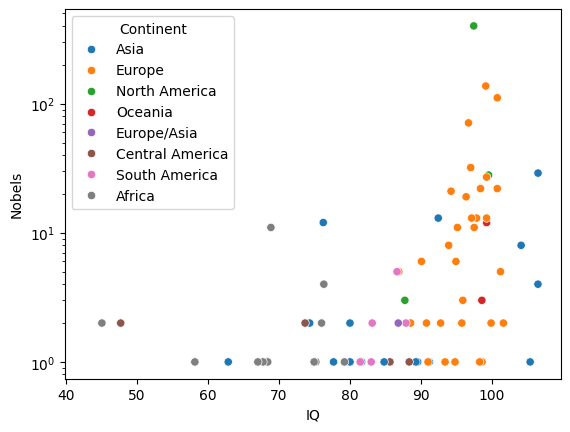

In [19]:
sns.scatterplot(data=DF, x="IQ", y="Nobels", hue="Continent")
plt.yscale("log")

Text(0.5, 1.0, 'Distribution of IQ for each continent')

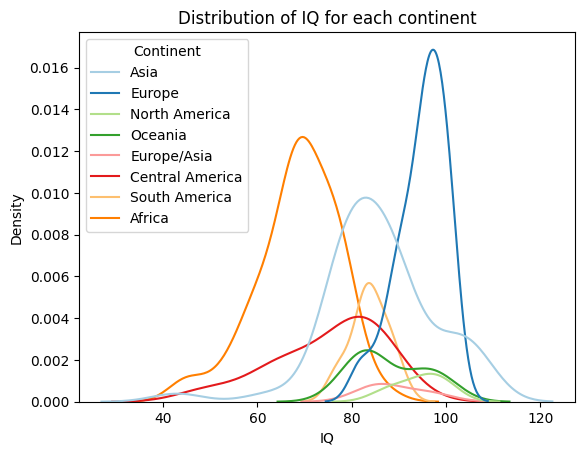

In [146]:
sns.kdeplot(data=DF, x="IQ", hue="Continent", palette=colours)
plt.title("Distribution of IQ for each continent")

<Axes: xlabel='HDI', ylabel='GNI'>

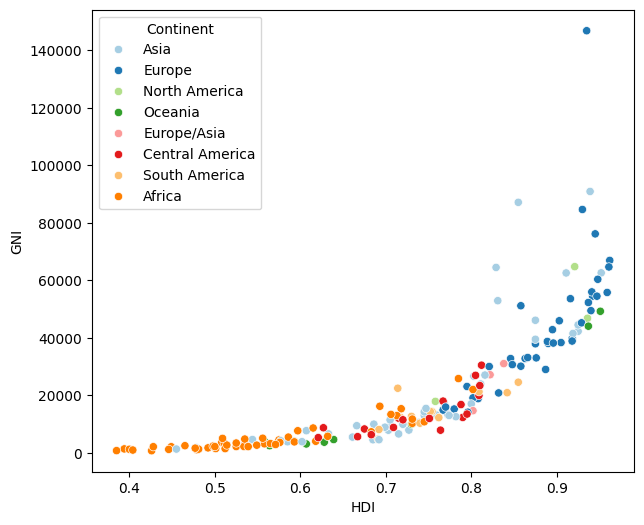

In [152]:
fig, ax = plt.subplots(figsize = (7,6))
sns.scatterplot(data=DF, y="GNI", x="HDI", hue="Continent", palette = colours,)  # TK
plt.title("Correlation between HDI and GNI")

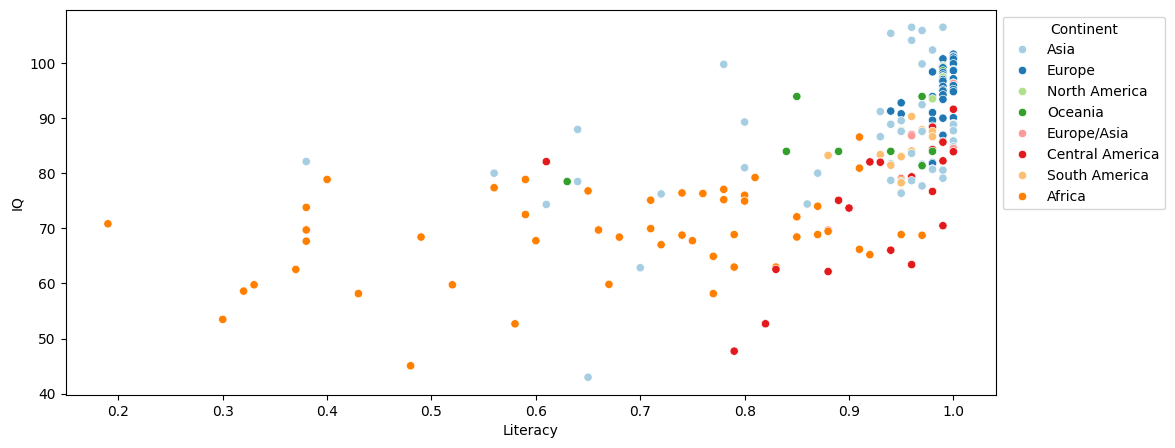

In [166]:
fig, ax = plt.subplots(figsize = (12,5))
sns.scatterplot(data=DF, y="IQ", x="Literacy", hue="Continent", palette=colours)  # TK7
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))


Text(0.5, 1.0, 'Distribution of IQ')

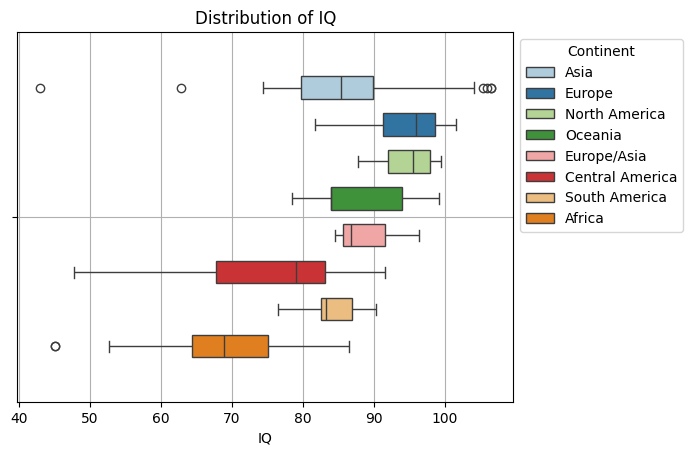

In [167]:
ax = sns.boxplot(data=DF, x="IQ", hue="Continent", gap=0.4, dodge=True, palette=colours)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.grid()
plt.title("Distribution of IQ")


Text(0.5, 1.0, 'Correlation between years spent in school and literacy rate')

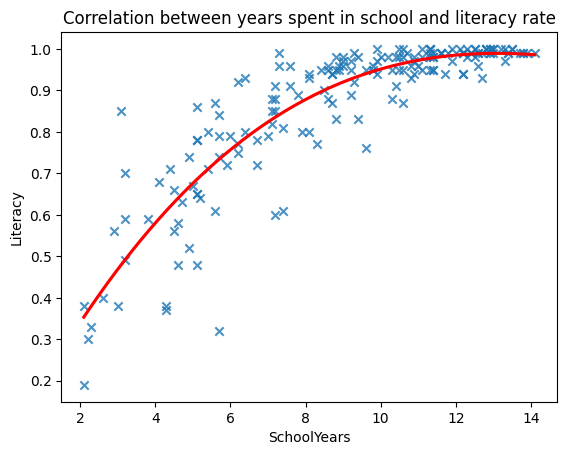

In [97]:
sns.regplot(DF, x = "SchoolYears", y = "Literacy", order=3, ci=0, marker="x", line_kws=dict(color="r")) #TK: come up with own funciton???
plt.title("Correlation between years spent in school and literacy rate")


In [174]:
rank_location = DF

rank_location['ISO_alpha'] = rank_location['Country'].apply(lambda x: pycountry.countries.get(name=x).alpha_3 if pycountry.countries.get(name=x) else None)

world = gp.read_file(gp.datasets.get_path('naturalearth_lowres'))

world = world.merge(rank_location, how='left', left_on='iso_a3', right_on='ISO_alpha')

fig = px.choropleth(
    world,
    locations='iso_a3',
    color='Population',
    color_continuous_scale='YlOrRd',
    labels={'Rank': 'Rank'},
    title='Rank by Country'
)

fig.show()

C:\Users\dima1\AppData\Local\Temp\ipykernel_33632\3831093001.py:5: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



Text(0.5, 1.0, 'Most populated counties')

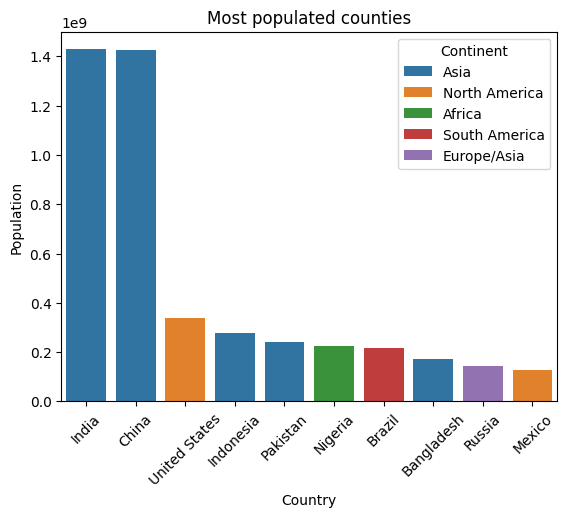

In [111]:
sns.barplot(DF.sort_values(by = "Population", ascending=False).head(10), x= "Country", y = "Population", hue = "Continent")
plt.xticks(rotation = 45)
plt.title("Most populated counties") #TK - not significant

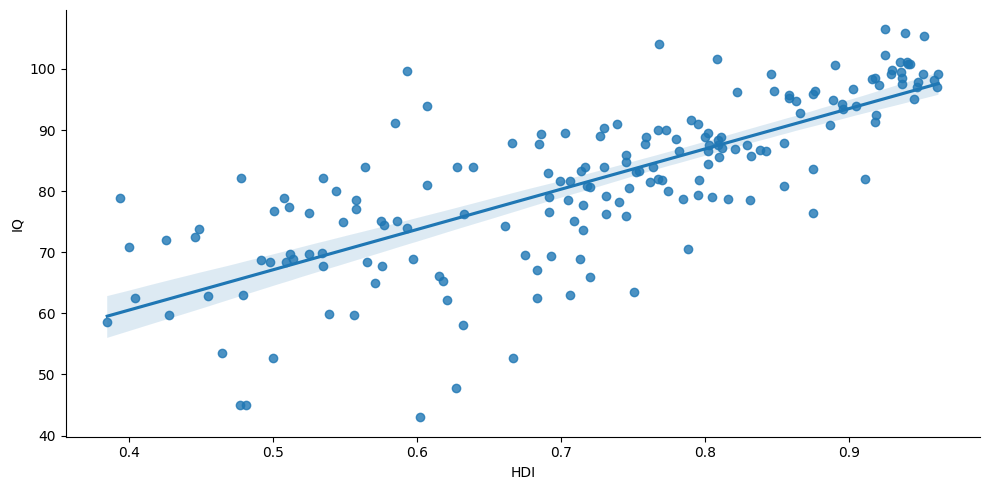

In [115]:
sns.lmplot(DF, x = "HDI", y = "IQ", aspect=2)

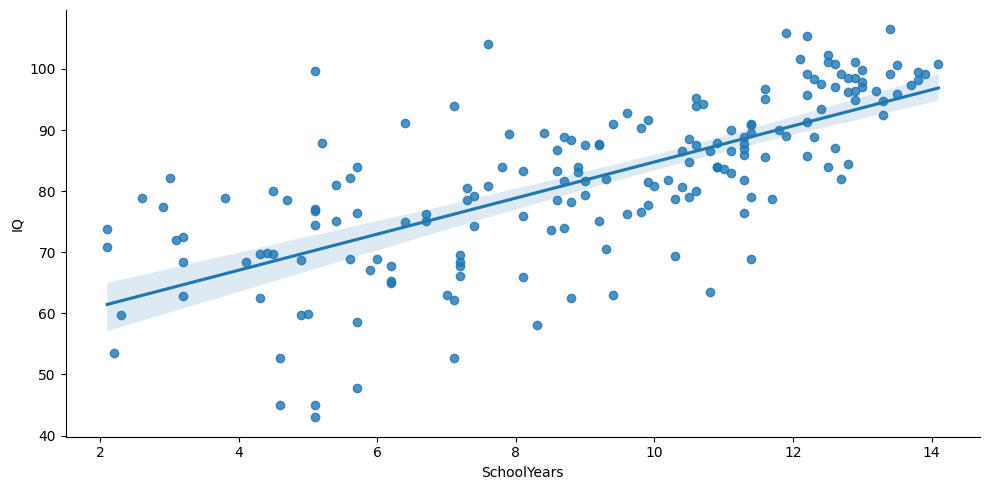

In [116]:
sns.lmplot(DF, x = "SchoolYears", y = "IQ", aspect=2)


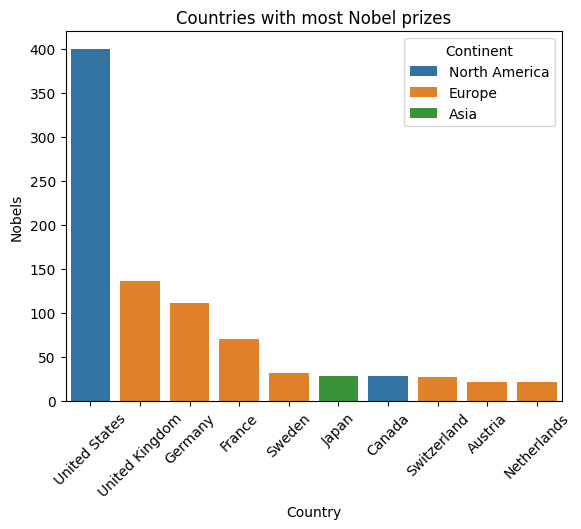

In [124]:
sns.barplot(DF.query("Nobels > 0").sort_values(by  = "Nobels", ascending=False).head(10), x = "Country", y = "Nobels", hue = "Continent")
plt.xticks(rotation = 45)
plt.title("Countries with most Nobel prizes")
plt.show()

In [117]:
DF

,Rank,Country,IQ,Continent,Literacy,Nobels,HDI,SchoolYears,GNI,Population
0,1,Japan,106.48,Asia,0.99,29,0.925,13.4,42274.0,1.232945e+08
1,2,Taiwan,106.47,Asia,0.96,4,NaN,NaN,NaN,1.014354e+07
2,3,Singapore,105.89,Asia,0.97,0,0.939,11.9,90919.0,6.014723e+06
3,4,Hong Kong,105.37,Asia,0.94,1,0.952,12.2,62607.0,7.491609e+06
4,5,China,104.10,Asia,0.96,8,0.768,7.6,17504.0,1.425671e+09
...,...,...,...,...,...,...,...,...,...,...
188,189,Gambia,52.68,Africa,0.58,0,0.500,4.6,2172.0,2.773168e+06
189,190,Guatemala,47.72,Central America,0.79,2,0.627,5.7,8723.0,1.809203e+07
190,191,Liberia,45.07,Africa,0.48,2,0.481,5.1,1289.0,5.418377e+06
191,192,Sierra Leone,45.07,Africa,0.48,0,0.477,4.6,1622.0,8.791092e+06


In [24]:
dfg = gp.GeoDataFrame(DF)


dfg["geometry"] = gp.tools.geocode(
    dfg["Country"], provider="nominatim", user_agent="add-your-app-name-here"
).geometry
dfg.crs = "EPSG:4326"
dfg.head()

# dfg = dfg.to_crs(epsg=3857)
# ax = dfg.plot(figsize=(16, 10), alpha=0.75, edgecolor='k', marker='o', color='red', markersize=dfg.Reach*5)
# ctx.add_basemap(ax)
# ax.set_axis_off()

C:\Users\dima1\AppData\Local\Temp\ipykernel_33632\2119421748.py:4: FutureWarning:

You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.



,Rank,Country,IQ,Continent,Literacy,Nobels,HDI,SchoolYears,GNI,Population,geometry
0,1,Japan,106.48,Asia,0.99,29,0.925,13.4,42274.0,1.232945e+08,POINT (139.23942 36.57484)
1,2,Taiwan,106.47,Asia,0.96,4,NaN,NaN,NaN,1.014354e+07,POINT (120.83538 23.59832)
2,3,Singapore,105.89,Asia,0.97,0,0.939,11.9,90919.0,6.014723e+06,POINT (103.81950 1.35711)
3,4,Hong Kong,105.37,Asia,0.94,1,0.952,12.2,62607.0,7.491609e+06,POINT (114.18492 22.35063)
4,5,China,104.10,Asia,0.96,8,0.768,7.6,17504.0,1.425671e+09,POINT (-94.33574 30.04799)


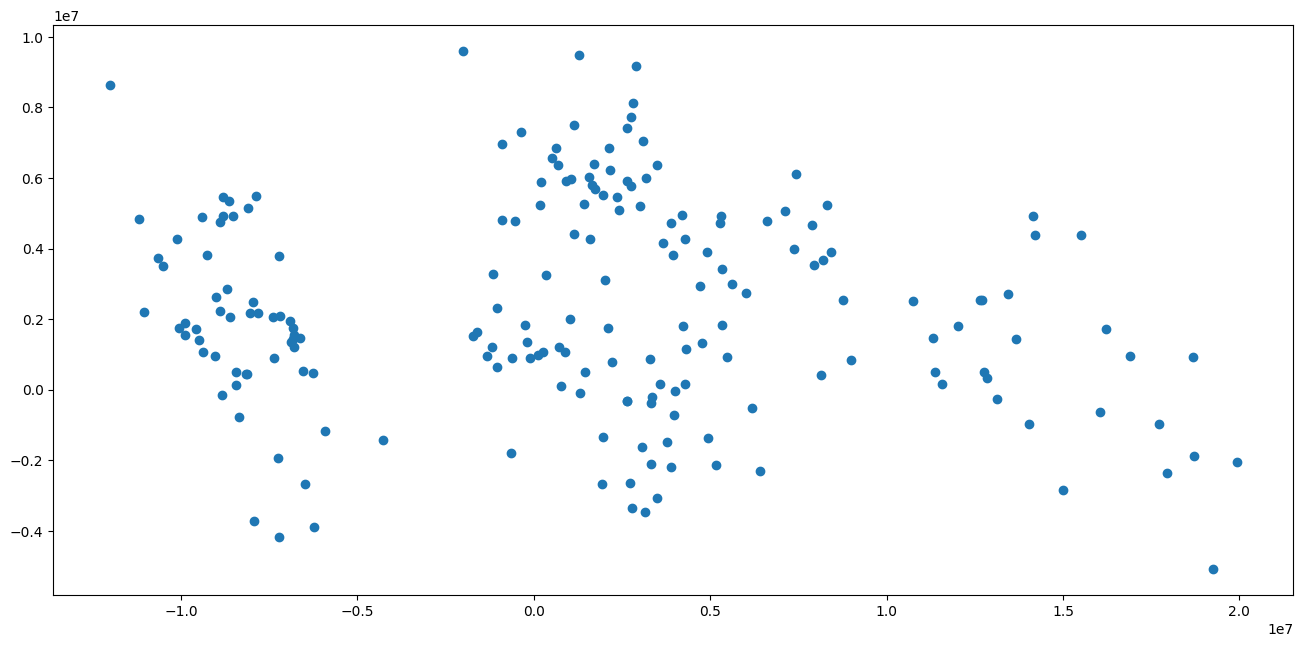

In [ ]:
dfg = dfg.to_crs(epsg=3857)
ax = dfg.plot(figsize=(16, 10))
# ctx.add_basemap(ax)
ax.set_axis_off()

<Axes: >

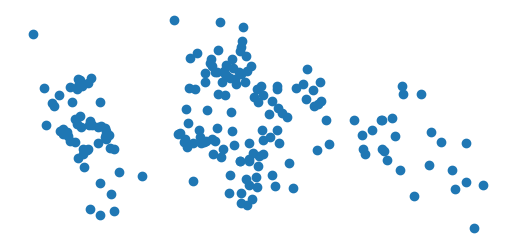

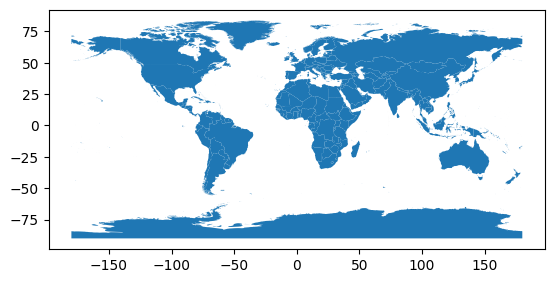

In [26]:
MAP = gp.read_file("../Data/World_Countries/World_Countries.shp")
dfg = dfg.to_crs(epsg=3857)
ax = dfg.plot()  # figsize=(16, 10))
# ctx.add_basemap(ax)
ax.set_axis_off()

MAP.plot()

Text(0.5, 1.0, 'Kings County Price Heatmap')

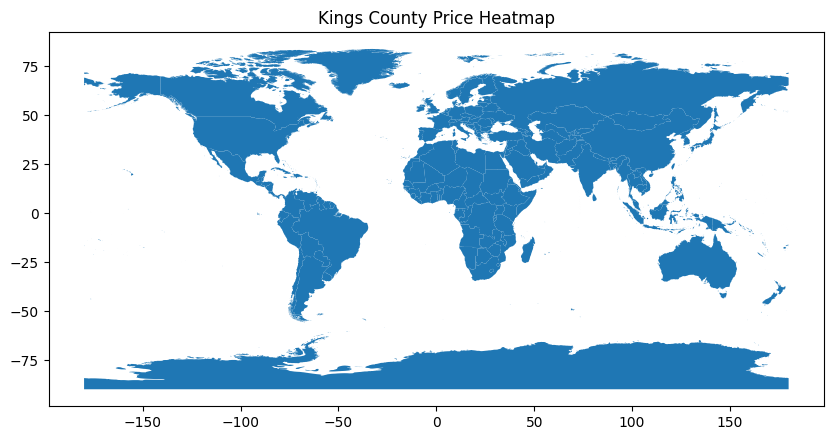

In [63]:
fig, ax = plt.subplots(figsize=(10, 10))
# dfg.plot(column = 'Nobels', ax=ax,
#             legend = True, legend_kwds={'shrink': 0.3},
#             markersize = 15)

MAP.to_crs(epsg=4326).plot(ax=ax, figsize=(10, 10)).plot()
ax.set_title("Kings County Price Heatmap")

<Axes: >

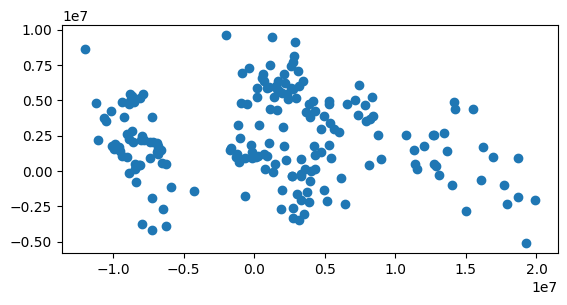

In [52]:
dfg.plot()